In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.3f}'.format)

In [4]:
df = pd.read_csv('../data/final.csv', index_col=0)

# Top  model counts, Last 20 yrs in df NOT filtered by "make"

In [5]:
model_counts = df.groupby(['make', 'model']).size().reset_index(name='count')
model_counts

,make,model,count
0,107.5 Flying,One Design Dr 107,1
1,177Mf Llc,Pitts Model 12,1
2,2003 Nash,Kitfox Ii,1
3,2007 Savage,Epic Lt,1
4,2021Fx3 Llc,Ccx2000,2
...,...,...,...
8103,Zodiac,601Xl,1
8104,Zorn,Eaa Sport BiPlane,1
8105,Zubair S,Raven,1
8106,Zuber Thomas,Zuber Super Drifter,1


# 4,950 unique plane models

Simply too many to evaluate

In [6]:
# top 100 recorded models in last 20 years
# lowest num_flights is 47

x = 100
top_x_models = model_counts.sort_values(by='count', ascending=False).head(x)
top_x_models.head(10)

,make,model,count
1954,Cessna,172,816
1248,Boeing,737,477
1944,Cessna,152,381
1987,Cessna,172S,328
2016,Cessna,182,318
1982,Cessna,172N,311
6003,Piper,Pa28,300
1999,Cessna,180,242
6010,Piper,Pa28140,230
1981,Cessna,172M,227


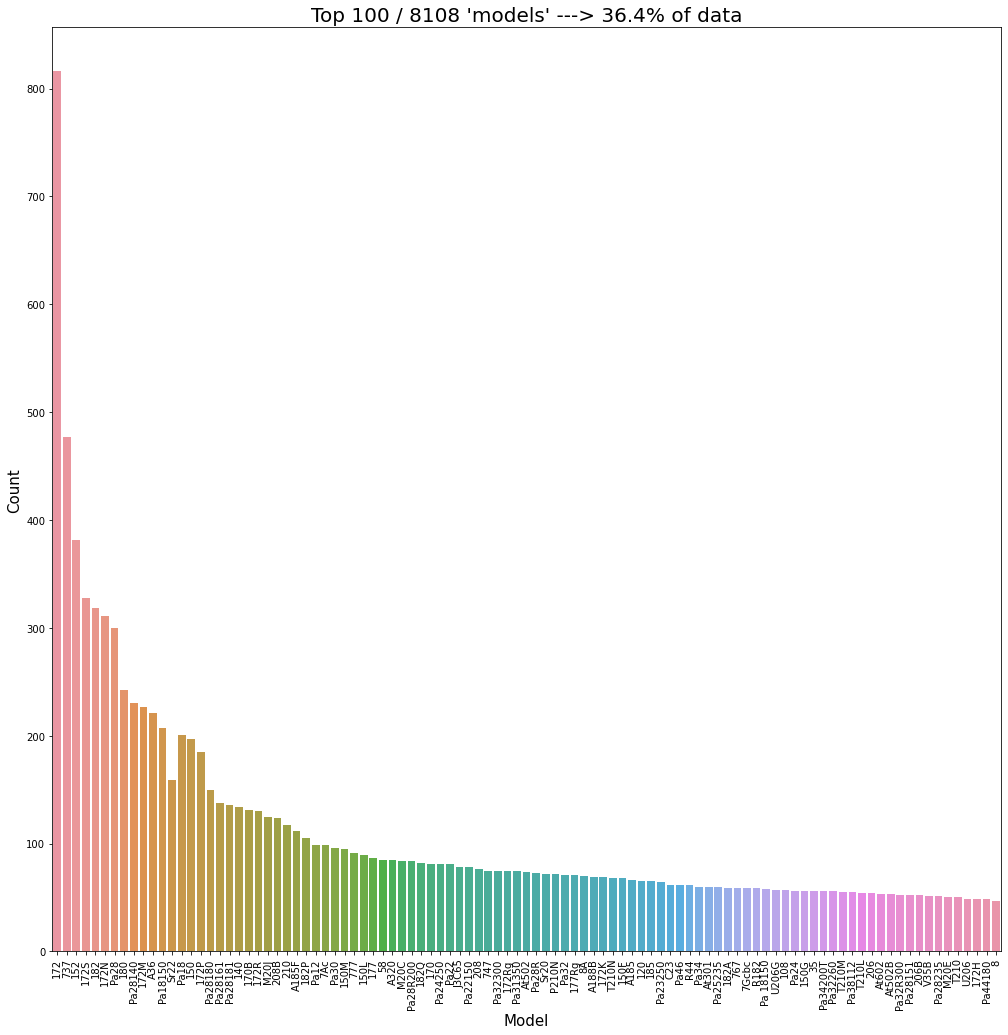

In [7]:
fig, ax = plt.subplots(figsize=(17,17))

sns.barplot(data=top_x_models, x='model', y='count', ci=None)

plt.title(f'Top {x} / {model_counts.shape[0]} \'models\' ---> {(top_x_models["count"].sum()/df.shape[0])*100:.1f}% of data', fontsize=20)
ax.set_xlabel('Model', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

plt.xticks(rotation=90)

plt.show()

# Out of top 100 most reported models in last 20 years, which ones are safest?

In [8]:
# function to calculate fatality rate
def compute_fatality_rate(model, df):
    value_counts = df[df['model'] == model]['injury_severity'].value_counts()
    return value_counts.get('fatal', 0) / value_counts.sum()

# create fatality_rate column from injury_severity percentages
top_x_models['fatality_rate'] = top_x_models['model'].map((lambda model: compute_fatality_rate(model, df)))

print('Top 20 models with lowest fatality_rate')
top_x_models = top_x_models.sort_values(by='fatality_rate', ascending=True)
top_x_models['make_model'] = top_x_models['make'] + ' ' +  top_x_models['model']
top_x_models['make_model'].values

Top 20 models with lowest fatality_rate


array(['Boeing 777', 'Boeing 767', 'Boeing 747', 'Boeing 737',
       'Cessna 182A', 'Airbus A320', 'Stinson 108', 'Piper Pa18150',
       'Cessna 120', 'Piper Pa22', 'Piper Pa18', 'Cessna 180',
       'Cessna 170', 'Piper Pa22150', 'Luscombe 8A', 'Cessna 140',
       'Cessna 170B', 'Air Tractor At301', 'Piper J3C65', 'Cessna 152',
       'Cessna 172P', 'Piper Pa 18150', 'Luscombe 8', 'Cessna 172Rg',
       'Cessna A185', 'Aeronca 7Ac', 'Air Tractor At502B', 'Cessna 172R',
       'Cessna 172S', 'Cessna 150G', 'Beech C23', 'Piper Pa12',
       'Piper Pa28161', 'Cessna A185F', 'Cessna 172K', 'Cessna 185',
       'Cessna 172M', 'Cessna 150L', 'Cessna 172H', 'Cessna 177',
       'Cessna 150F', 'Cessna T210L', 'Cessna 172N', 'Cessna R182',
       'Cessna 172', 'Piper Pa28151', 'Beech 35', 'Piper Pa24',
       'Cessna 177Rg', 'Bellanca 7Gcbc', 'Cessna A188B', 'Cessna P210N',
       'Cessna 150M', 'Bell 206B', 'Piper Pa28180', 'Cessna 182P',
       'Cessna T210M', 'Cessna 150', 'Piper Pa44180

In [9]:
# rough estimates
aircraft_seats = {
    'Boeing 777': 400,
    'Boeing 767': 250,
    'Boeing 747': 416,
    'Boeing 737': 160,
    'Cessna 182A': 4,
    'Airbus A320': 186,
    'Stinson 108': 4,
    'Piper Pa18150': 2,
    'Cessna 120': 2,
    'Piper Pa22': 4,
    'Piper Pa18': 2,
    'Cessna 180': 4,
    'Cessna 170': 4,
    'Piper Pa22150': 2,
    'Luscombe 8A': 2,
    'Cessna 140': 2,
    'Cessna 170B': 4,
    'Piper J3C65': 2,
    'Air Tractor At301': 1,
    'Cessna 152': 2,
    'Cessna 172P': 4,
    'Piper Pa 18150': 2,
    'Luscombe 8': 2,
    'Cessna 172Rg': 4,
    'Cessna A185': 6,
    'Aeronca 7Ac': 2,
    'Air Tractor At502B': 1,
    'Cessna 172R': 4,
    'Cessna 172S': 4,
    'Cessna 150G': 2,
    'Beech C23': 4,
    'Piper Pa12': 2,
    'Piper Pa28161': 4,
    'Cessna A185F': 6,
    'Cessna 172K': 4,
    'Cessna 185': 6,
    'Cessna 172M': 4,
    'Cessna 150L': 2,
    'Cessna 172H': 4,
    'Cessna 177': 4,
    'Cessna 150F': 2,
    'Cessna T210L': 6,
    'Cessna 172N': 4,
    'Cessna R182': 4,
    'Cessna 172': 4,
    'Piper Pa28151': 4,
    'Beech 35': 6,
    'Piper Pa24': 4,
    'Cessna 177Rg': 4,
    'Bellanca 7Gcbc': 2,
    'Cessna A188B': 1,
    'Cessna P210N': 6,
    'Cessna 150M': 2,
    'Bell 206B': 5,
    'Piper Pa28180': 4,
    'Cessna 182P': 4,
    'Cessna T210M': 6,
    'Cessna 150': 2,
    'Piper Pa44180': 8,
    'Piper Pa28': 4,
    'Piper Pa28140': 4,
    'Piper Pa38112': 6,
    'Piper Pa28235': 4,
    'Piper Pa32': 6,
    'Cessna 182': 4,
    'Cessna T210N': 6,
    'Mooney M20E': 4,
    'Piper Pa28R': 4,
    'Air Tractor At602': 1,
    'Piper Pa46': 6,
    'Air Tractor At502': 1,
    'Piper Pa24250': 6,
    'Piper Pa28181': 4,
    'Cessna 206': 6,
    'Piper Pa31350': 6,
    'Cessna U206G': 6,
    'Cessna 210': 6,
    'Piper Pa28R200': 4,
    'Cessna 208B': 14,
    'Mooney M20C': 4,
    'Mooney M20J': 4,
    'Piper Pa25235': 6,
    'Cessna T210': 6,
    'Piper Pa32300': 6,
    'Cirrus Design Sr20': 4,
    'Cessna 182Q': 4,
    'Piper Pa32260': 6,
    'Cirrus Sr22': 5,
    'Cirrus Design Sr22': 5,
    'Beech V35B': 6,
    'Cessna 208': 14,
    'Beech A36': 6,
    'Cessna U206': 6,
    'Piper Pa30': 4,
    'Piper Pa32R300': 6,
    'Piper Pa34200T': 7,
    'Beech 58': 6,
    'Piper Pa23250': 6,
    'Piper Pa34': 6,
    'Robinson R44': 4
}

# create num_seats column
top_x_models['num_seats'] = top_x_models['make_model'].map(aircraft_seats)
top_x_models.head(20)

,make,model,count,fatality_rate,make_model,num_seats
1433,Boeing,777,91,0.000,Boeing 777,400
1397,Boeing,767,59,0.017,Boeing 767,250
1335,Boeing,747,75,0.027,Boeing 747,416
1248,Boeing,737,477,0.034,Boeing 737,160
2022,Cessna,182A,59,0.034,Cessna 182A,4
320,Airbus,A320,85,0.043,Airbus A320,186
7240,Stinson,108,57,0.050,Stinson 108,4
5953,Piper,Pa18150,207,0.056,Piper Pa18150,2
1926,Cessna,120,65,0.061,Cessna 120,2
5969,Piper,Pa22,81,0.062,Piper Pa22,4


# Top 100 recorded planes
- 94/100 are <10 seats
- 6/100 are >100 seats

In [10]:
top_x_models.sort_values(by='num_seats').tail(10)

,make,model,count,fatality_rate,make_model,num_seats
2182,Cessna,A185F,112,0.134,Cessna A185F,6
6084,Piper,Pa34200T,56,0.393,Piper Pa34200T,7
6097,Piper,Pa44180,49,0.220,Piper Pa44180,8
2072,Cessna,208B,124,0.283,Cessna 208B,14
2071,Cessna,208,76,0.355,Cessna 208,14
1248,Boeing,737,477,0.034,Boeing 737,160
320,Airbus,A320,85,0.043,Airbus A320,186
1397,Boeing,767,59,0.017,Boeing 767,250
1433,Boeing,777,91,0.000,Boeing 777,400
1335,Boeing,747,75,0.027,Boeing 747,416


In [11]:
# add total injuries per model
for col in ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured']:
    top_x_models[col] = top_x_models['model'].map(lambda model_name: 
                                         df[df['model'] == model_name][col].sum())

# add avg inj per crash
for col in ['avg_fatal_injuries', 'avg_serious_injuries', 'avg_minor_injuries', 'avg_uninjured']:
    top_x_models[col] = top_x_models['total'+col[3:]] / top_x_models['count']

top_x_models.sort_values(by='num_seats').tail(10)

,make,model,count,fatality_rate,make_model,num_seats,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,avg_fatal_injuries,avg_serious_injuries,avg_minor_injuries,avg_uninjured
2182,Cessna,A185F,112,0.134,Cessna A185F,6,28,18,6,184,0.250,0.161,0.054,1.643
6084,Piper,Pa34200T,56,0.393,Piper Pa34200T,7,48,7,5,55,0.857,0.125,0.089,0.982
6097,Piper,Pa44180,49,0.220,Piper Pa44180,8,26,12,0,77,0.531,0.245,0.000,1.571
2072,Cessna,208B,124,0.283,Cessna 208B,14,122,75,111,312,0.984,0.605,0.895,2.516
2071,Cessna,208,76,0.355,Cessna 208,14,96,35,53,237,1.263,0.461,0.697,3.118
1248,Boeing,737,477,0.034,Boeing 737,160,1348,383,84,24525,2.826,0.803,0.176,51.415
320,Airbus,A320,85,0.043,Airbus A320,186,283,11,13,4457,3.329,0.129,0.153,52.435
1397,Boeing,767,59,0.017,Boeing 767,250,3,64,19,5591,0.051,1.085,0.322,94.763
1433,Boeing,777,91,0.000,Boeing 777,400,0,27,23,9414,0.000,0.297,0.253,103.451
1335,Boeing,747,75,0.027,Boeing 747,416,6,72,6,2478,0.080,0.960,0.080,33.040


In [12]:
# function to get normalized aircraft_damage value counts for each model
def get_damage_distribution(model):
    df_new = df[df['model'] == model]
    
    return df_new['aircraft_damage'].value_counts(normalize=True)

In [13]:
# adding normalized damage distributions for each model
damage_df = top_x_models['model'].apply(get_damage_distribution)
top_x_models = pd.concat([top_x_models, damage_df], axis=1)

# replace nan with 0
top_x_models = top_x_models.fillna(0)
top_x_models

,make,model,count,fatality_rate,make_model,num_seats,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,avg_fatal_injuries,avg_serious_injuries,avg_minor_injuries,avg_uninjured,Unknown,Minor,Substantial,Destroyed
1433,Boeing,777,91,0.000,Boeing 777,400,0,27,23,9414,0.000,0.297,0.253,103.451,0.560,0.319,0.110,0.011
1397,Boeing,767,59,0.017,Boeing 767,250,3,64,19,5591,0.051,1.085,0.322,94.763,0.525,0.254,0.186,0.034
1335,Boeing,747,75,0.027,Boeing 747,416,6,72,6,2478,0.080,0.960,0.080,33.040,0.387,0.440,0.147,0.027
1248,Boeing,737,477,0.034,Boeing 737,160,1348,383,84,24525,2.826,0.803,0.176,51.415,0.566,0.260,0.143,0.031
2022,Cessna,182A,59,0.034,Cessna 182A,4,5,20,15,70,0.085,0.339,0.254,1.186,0.000,0.000,0.966,0.034
320,Airbus,A320,85,0.043,Airbus A320,186,283,11,13,4457,3.329,0.129,0.153,52.435,0.796,0.118,0.043,0.043
7240,Stinson,108,57,0.050,Stinson 108,4,5,24,16,59,0.088,0.421,0.281,1.035,0.000,0.000,1.000,0.000
5953,Piper,Pa18150,207,0.056,Piper Pa18150,2,18,39,15,237,0.087,0.188,0.072,1.145,0.000,0.000,0.981,0.019
1926,Cessna,120,65,0.061,Cessna 120,2,6,9,6,160,0.092,0.138,0.092,2.462,0.015,0.000,0.924,0.061
5969,Piper,Pa22,81,0.062,Piper Pa22,4,11,21,13,91,0.136,0.259,0.160,1.123,0.000,0.000,0.938,0.062


# Have a df with basically all the safety data we can wrangle on the top 100 recorded models since 2003

- time to make some plots :D

In [20]:
# for the BIG BOYS
# can't really use damage classification as each has over 
commercial_planes = top_x_models.sort_values(by='num_seats').tail(5)
commercial_planes['make_model'] = commercial_planes['make'] + ' ' + commercial_planes['model']
commercial_planes

,make,model,count,fatality_rate,make_model,num_seats,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,avg_fatal_injuries,avg_serious_injuries,avg_minor_injuries,avg_uninjured,Unknown,Minor,Substantial,Destroyed
1248,Boeing,737,477,0.034,Boeing 737,160,1348,383,84,24525,2.826,0.803,0.176,51.415,0.566,0.260,0.143,0.031
320,Airbus,A320,85,0.043,Airbus A320,186,283,11,13,4457,3.329,0.129,0.153,52.435,0.796,0.118,0.043,0.043
1397,Boeing,767,59,0.017,Boeing 767,250,3,64,19,5591,0.051,1.085,0.322,94.763,0.525,0.254,0.186,0.034
1433,Boeing,777,91,0.000,Boeing 777,400,0,27,23,9414,0.000,0.297,0.253,103.451,0.560,0.319,0.110,0.011
1335,Boeing,747,75,0.027,Boeing 747,416,6,72,6,2478,0.080,0.960,0.080,33.040,0.387,0.440,0.147,0.027


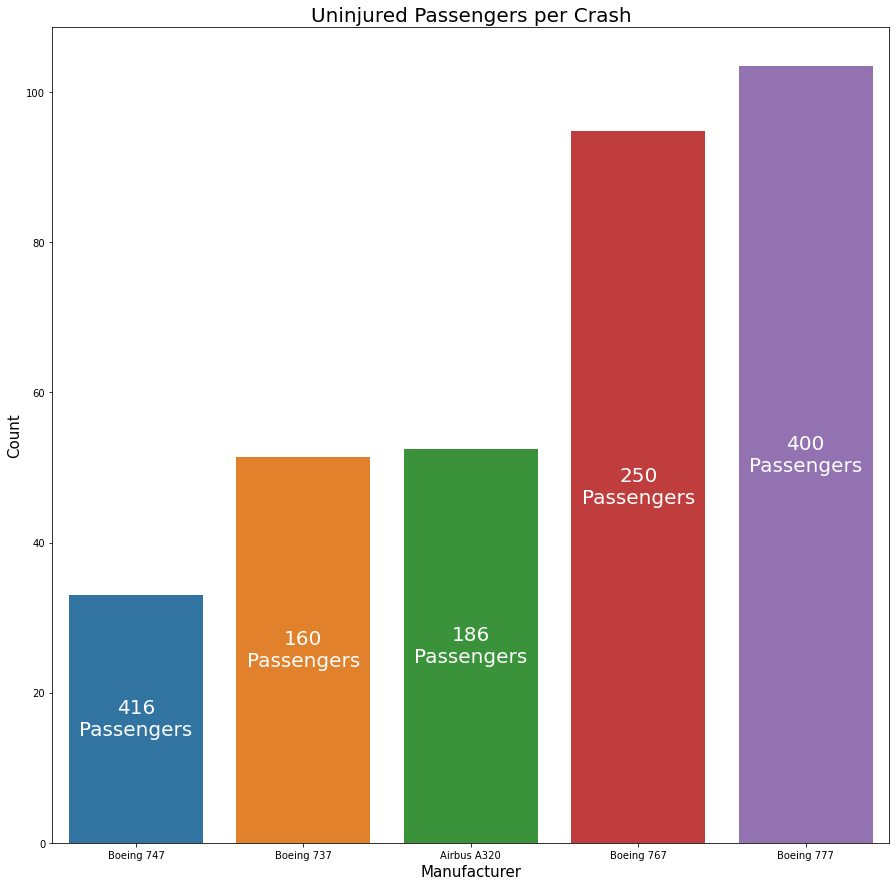

In [21]:
fig, ax =plt.subplots(figsize=(15,15))

sorted_data = commercial_planes.sort_values(by='avg_uninjured')
sns.barplot(data=sorted_data, x='make_model', y='avg_uninjured', ax=ax)

ax.set_title('Uninjured Passengers per Crash', fontsize=20)
ax.set_xlabel('Manufacturer', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

for bar, num_seats in zip(ax.patches, sorted_data['num_seats']):
    ax.annotate(text=str(num_seats) + '\nPassengers', 
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),
                ha='center', va='center', color='white', fontsize=20)


# Overview of the data we're working with:

- Every data point/row represents an occurence of an aviation accident
- 2003-2022 (last 20 years)
- No 'amateur_built' planes


In [284]:
# find at what percent each make occurs in df
norm_counts = df['make'].value_counts(normalize=True).values
(f'Top 20 makes = {norm_counts[:20].sum() * 100:.2f}% of data')

'Top 20 makes = 76.41% of data'

In [ ]:
unneeded_rows = df[df['purpose_of_flight'].isin(['Skydiving'])]
df = df.drop(unneeded_rows.index)

commercial = ['Business', 'Ferry', 'Executive/corporate', 'Flight Test']
private = ['Personal', 'Instructional', 'Positioning', 'Aerial Observation']
work = ['Aerial Application', 'Other Work Use', 'Public Aircraft', 'Public Aircraft - Federal', 'Public Aircraft - State', 
        'Public Aircraft - Local', 'Firefighting']

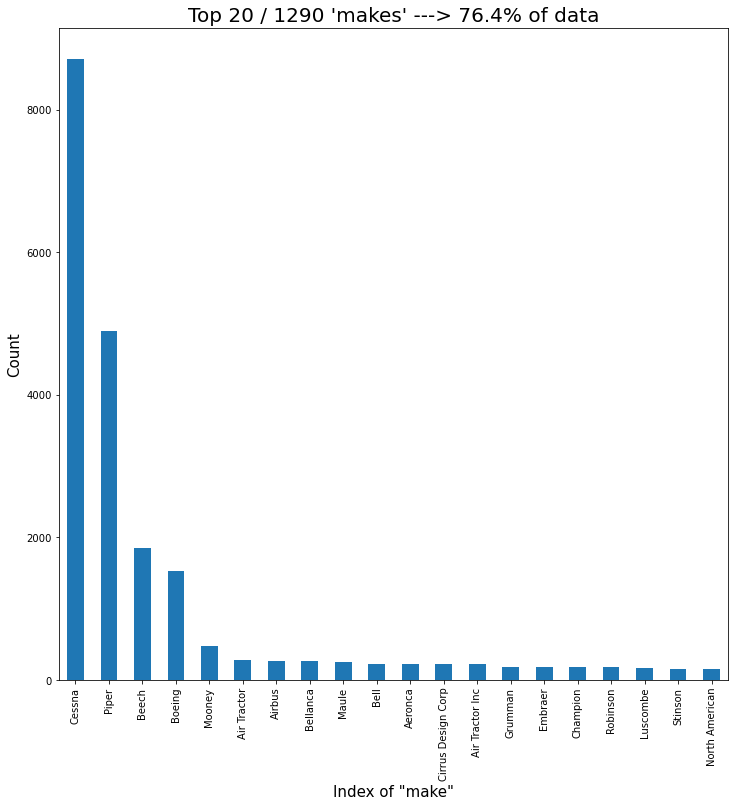

In [81]:
num_makes = 20
top_20_makes = df['make'].value_counts().head(num_makes)

top_20_makes.plot(kind='bar', figsize=(12,12))

plt.title(f'Top {num_makes} / {df["make"].nunique()} \'makes\' ---> {(top_20_makes.sum()/df["make"].value_counts().sum())*100:.1f}% of data', fontsize=20)
plt.xlabel('Index of "make"', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

# Going from top 20 -> top 7 only goes from 76% -> 67% of data

- Taking top 7 so we have representation from all 3 business categories.\
- Represents right at 2/3 of our data from last 20 years

In [84]:
top_7_index = df['make'].value_counts().index[:7]
top_7_values = df['make'].value_counts().values[:7]

(f'Top 7 makes = {norm_counts[:7].sum() * 100:.2f}% of data')

'Top 7 makes = 66.75% of data'

In [88]:
# this df only contains accidents from the top 7 manufacturers
top_7_makes = df[df['make'].isin(top_7_index)]
top_7_makes.head()

,investigation_type,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,year
0,Accident,"TUCSON, AZ",United States,fatal,Destroyed,Unknown,Beech,95,2,Reciprocating,Personal,1,3,0,0,VMC,Takeoff,2003
5,Accident,"JESSUP, GA",United States,non-fatal,Substantial,Unknown,Cessna,150K,1,Reciprocating,Personal,0,0,0,1,VMC,Cruise,2003
6,Accident,"MC ALLEN, TX",United States,non-fatal,Substantial,Unknown,Cessna,401,2,Reciprocating,Personal,0,0,0,1,VMC,Cruise,2003
7,Accident,"ALTON, IL",United States,non-fatal,Substantial,Unknown,Cessna,182S,1,Reciprocating,Instructional,0,0,0,1,VMC,Takeoff,2003
9,Accident,"Santo Domingo, Dominican Republic",Dominican Republic,fatal,Destroyed,Airplane,Beech,Be-60,0,Unknown,Personal,1,1,0,0,VMC,Unknown,2003


# Condensing the large group of df['make'] (plane manufacturer)

- Need to classify the 27000 planes that I have as Private, Commercial, or Work using the 'purpose of flight' column

- Commercial: Large-scale planes that hold many passengers (like the ones used at normal airports).

- Private: Smaller planes for business travels (like private jets).

- Work: Well-rounded planes made for specific tasks (crop-dusting, firefighting, etc).

In [58]:
df['purpose_of_flight'].value_counts(normalize=True)
print('Taking a look at purpose_of_flight for Cessna:')
df[df['make'] == 'Cessna'][['purpose_of_flight']].value_counts()

Personal                    0.536
Unknown                     0.191
Instructional               0.125
Aerial Application          0.044
Business                    0.026
Positioning                 0.020
Other Work Use              0.010
Aerial Observation          0.008
Flight Test                 0.006
Ferry                       0.005
Executive/corporate         0.005
Skydiving                   0.005
Public Aircraft             0.004
Banner Tow                  0.004
Public Aircraft - Federal   0.003
Air Race show               0.002
Glider Tow                  0.002
Public Aircraft - State     0.001
Air Race/show               0.001
Firefighting                0.001
Public Aircraft - Local     0.001
External Load               0.001
ASHO                        0.000
Air Drop                    0.000
PUBS                        0.000
Name: purpose_of_flight, dtype: float64

# model -> purpose

- take top 5 highest-frequency models from each make
- map each model to most common purpose_of_flight
- map those purposes to one category in [commercial, private, work]

In [91]:
print(f'top_7_makes.shape: {top_7_makes.shape} -> 18k plane crashes to analyze')

top_7_makes.shape: (18011, 18) -> 18k plane crashes to analyze


In [101]:
top_7_makes[top_7_makes['make'] == 'Airbus']['model'].value_counts()

A320          84
A330          32
A321          20
A319          16
A300          10
              ..
A330 - 203     1
A330 - 301     1
A320 233       1
220            1
330            1
Name: model, Length: 66, dtype: int64

In [110]:
# df to hold top 5 models from each of top 7 makes
groups = top_7_makes.groupby(['make', 'model']).size().reset_index(name='count')
models_df = groups.groupby('make').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)
models_df

,make,model,count
0,Air Tractor,At502,39
1,Air Tractor,At-502B,27
2,Air Tractor,At-301,26
3,Air Tractor,At802,21
4,Air Tractor,At-602,19
5,Airbus,A320,84
6,Airbus,A330,32
7,Airbus,A321,20
8,Airbus,A319,16
9,Airbus,A300,10


# Investigating the safety of these top 7 makes
- avg injury severity
- avg [fatal, serious, minor]

In [30]:
# get counts for each of the top 7 makes
make_counts = df['make'].value_counts()[:7].reset_index()
make_counts.columns = ['make', 'num_flights']
make_counts

,make,num_flights
0,Cessna,8711
1,Piper,4901
2,Beech,1849
3,Boeing,1526
4,Mooney,471
5,Air Tractor,287
6,Airbus,266


In [31]:
# calculate average injuries for each unique plane
cols = ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured', 'number_of_engines']
makes_stats = top_7_makes.groupby('make')[cols].mean().reset_index()

# rename to 'avg'
makes_stats.columns = ['make', 'avg_fatal_injuries', 'avg_serious_injuries', 'avg_minor_injuries', 'avg_uninjured', 'avg_num_engines']

# merge with make_counts to add num_flights
makes_stats = makes_stats.merge(make_counts, on='make', how='left')

print('Average stats for top 7 makes:')
makes_stats

NameError: name 'top_7_makes' is not defined

In [32]:
# reshape df to long format
df_long = makes_stats.melt(id_vars='make',
                  value_vars=['avg_fatal_injuries', 'avg_serious_injuries', 'avg_minor_injuries'],
                  var_name='injury_type',
                  value_name='average')


fig, ax =plt.subplots(figsize=(12,12))

sns.barplot(data=df_long, x='make', y='average', hue='injury_type', ax=ax)

ax.set_title('Average Injuries per Crash', fontsize=20)
ax.set_xlabel('Manufacturer', fontsize=15)
ax.set_ylabel('Injuries', fontsize=15);

NameError: name 'makes_stats' is not defined

### The above graphic does not take into account num_passengers per flight/accident

- Boeing has highest injury counts per accident but also has highest uninjured count (by far). This means boeing planes are predominantly large, commercial vessels.
- Cessna has lowest injury statistics per crash. Piper is close second.

# The 4 most recorded plane manufacturers (by far) in terms of accident reports are:

- Cessna
- Piper
- Beech
- Boeing

## Goal: Find top 10 safest models per make

# Question: How do we quantify "safety"? (without num_passengers)

- Using avg total_injury vals
- Low (avg_fatal or avg_serious) should up the 'safety score'. High values would lower the score.
- Opposite is true for (avg_minor or avg_uninjured)
- aircraft_damage is another factor

In [20]:
# new dataframe only holding 17k rows of top 4 makes
df_top_4 = df[df['make'].isin(['Cessna', 'Piper', 'Beech', 'Boeing'])]
df_top_4.shape

(17034, 23)

In [21]:
df_top_4['aircraft_damage'].unique()

array(['Destroyed', 'Substantial', 'Unknown', 'Minor'], dtype=object)

In [22]:
damage_df = makes_stats['make'].apply(get_damage_distribution)

# adding 4 columns showing normalized count (percent) of each category of aircraft damage
makes_stats = pd.concat([makes_stats, damage_df], axis=1)
makes_stats.shape

(4, 11)

In [23]:
# cleaning up makes_stats
makes_stats = makes_stats[['make', 'num_flights', 'avg_fatal_injuries', 'avg_serious_injuries', 
                           'avg_minor_injuries', 'avg_uninjured', 'Destroyed', 'Substantial', 'Minor', 'Unknown']]
makes_stats

,make,num_flights,avg_fatal_injuries,avg_serious_injuries,avg_minor_injuries,avg_uninjured,Destroyed,Substantial,Minor,Unknown
0,Beech,1853,0.772,0.241,0.199,1.273,0.209,0.740,0.026,0.024
1,Boeing,1548,2.660,0.923,0.339,71.176,0.041,0.225,0.248,0.485
2,Cessna,8723,0.391,0.225,0.189,1.232,0.117,0.848,0.014,0.021
3,Piper,4910,0.450,0.207,0.185,1.106,0.136,0.836,0.013,0.015


# Observations
- Hard to judge the injury numbers without knowing avg_passenger_count. Would need to look at specific models for each make to gain this insight.

- 25% of Boeing accident were classified as "Minor". This is much higher than the 3 private makes. Would be interested at comparing this number to __other commercial (large) planes__.
- Beech has a 21% "Destroyed" rate AND a 74% "Substantial" rate. __Significantly worse than Cessna and Piper__.
- Cessna and Piper are very comparable accross the board.

# 3 categories of aircraft_damage:

- Minor
- Substantial
- Destroyed

In [236]:
df_cessna = df_top_4[df_top_4['make'] == 'Cessna']
df_piper = df_top_4[df_top_4['make'] == 'Piper']
df_beech = df_top_4[df_top_4['make'] == 'Beech']
df_boeing = df_top_4[df_top_4['make'] == 'Boeing']

for df, name in zip([df_cessna, df_piper, df_beech, df_boeing], ['Cessna', 'Piper', 'Beech', 'Boeing']):
    print(f'df_{name} shape: {df.shape}, Num of unique models: {df["model"].nunique()}')

df_Cessna shape: (8723, 23), Num of unique models: 451
df_Piper shape: (4910, 23), Num of unique models: 373
df_Beech shape: (1853, 23), Num of unique models: 272
df_Boeing shape: (1548, 23), Num of unique models: 311


In [214]:
df_top_4['aircraft_damage'].value_counts(normalize=True)

Substantial    0.776095
Destroyed      0.125572
Unknown        0.061994
Minor          0.036339
Name: aircraft_damage, dtype: float64

In [283]:
df_cessna['aircraft_damage'].value_counts(normalize=True).values

array([0.84764416, 0.11670297, 0.02143758, 0.01421529])

In [216]:
df_piper['aircraft_damage'].value_counts(normalize=True)

Substantial    0.836049
Destroyed      0.136253
Unknown        0.015071
Minor          0.012627
Name: aircraft_damage, dtype: float64

In [217]:
df_beech['aircraft_damage'].value_counts(normalize=True)

Substantial    0.740421
Destroyed      0.209390
Minor          0.026444
Unknown        0.023745
Name: aircraft_damage, dtype: float64

In [218]:
df_boeing['aircraft_damage'].value_counts(normalize=True)

Unknown        0.485142
Minor          0.248062
Substantial    0.225452
Destroyed      0.041344
Name: aircraft_damage, dtype: float64

In [238]:
df_cessna['model'].value_counts()

172            816
152            381
172S           327
182            318
172N           311
              ... 
T182 - T         1
U-206G           1
F177Rg           1
C175A            1
Skyhawk 172      1
Name: model, Length: 451, dtype: int64